# Tensorflow 2.0 / Keras CNN Model

Simple CNN was attempted, but not enough data is available to yield good performance. Transfer or one-shot learning could be applied to tackle the lack of data but it is unecessary as the machine learning approach outperforms the deep learning approach. The scikit-learn and OpenCV approach was ultimately used in the final model.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import losses, optimizers
from tensorflow.keras import Input, Model, models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# --- Define kwargs
kwargs = {
    'kernel_size': (3, 3),
    'padding': 'same',}

# --- Define lambda functions
conv = lambda x, filters, strides : layers.Conv2D(filters=filters, strides=strides, **kwargs)(x)
norm = lambda x : layers.BatchNormalization()(x)
relu = lambda x : layers.LeakyReLU()(x)

# --- Define stride-1, stride-2 blocks
conv1 = lambda filters, x : norm(relu(conv(x, filters, strides=1)))
conv2 = lambda filters, x : norm(relu(conv(x, filters, strides=(2, 2))))

In [3]:
train_data_dir = 'dataset/spiral/training'
validation_data_dir = 'dataset/spiral/testing'
img_width = 300
img_height = 300
batch_size = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=12,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=5,
    class_mode='binary',
    color_mode='grayscale',)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [21]:
# --- Define the model
inputs = Input(shape=(img_width, img_height, 1))

l1 = conv1(16, inputs)
l2 = conv1(32, conv2(32, l1))
l3 = conv1(64, conv2(64, l2))
f0 = layers.Flatten()(l3)
d0 = layers.Dropout(rate=0.2)(f0)
f1 = layers.Dense(128, activation='relu')(d0)
d1 = layers.Dropout(rate=0.2)(f1)
f2 = layers.Dense(1, activation='sigmoid')(d1)

# --- Create model
model = Model(inputs=inputs, outputs=f2)

In [22]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300, 300, 1)]     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 300, 300, 16)      160       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 300, 300, 16)      0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 300, 300, 16)      64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 150, 150, 32)      128 

In [23]:
# --- Compile model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss=losses.BinaryCrossentropy(),
    metrics=['accuracy'])

In [24]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=6,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=6
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 6 steps
Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 6.4773 - accuracy: 0.5694 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 14s 2s/step - loss: 3.1618 - accuracy: 0.4861 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 1.7648 - accuracy: 0.4861 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 1.7960 - accuracy: 0.4583 - val_loss: 0.6927 - val_accuracy: 0.4667
Epoch 5/20
6/6 [==============================] - 14s 2s/step - loss: 1.1882 - accuracy: 0.5556 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 1.3688 - accuracy: 0.5278 - val_loss: 0.7521 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 1.0676 - acc

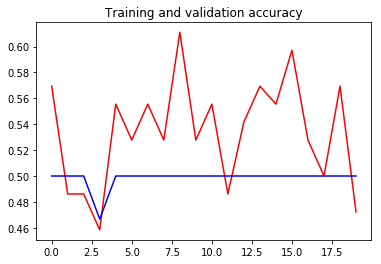

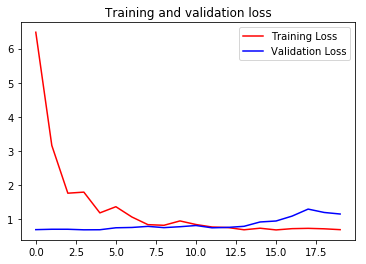

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()